In [21]:
# Specify model here
from src.models import resnet50 as model


def get_parameter_count(model):
    # Dictionary to store parameters for each layer
    layer_params = {}

    # Collect parameters for each layer
    for name, param in model.named_parameters():
        if param.requires_grad:
            # Extract the layer name (everything before the last dot)
            layer_name = name.rsplit(".", 1)[0]
            num_params = param.numel()
            layer_params[layer_name] = layer_params.get(layer_name, 0) + num_params

    # Print total parameters for each layer
    print("Parameters per layer:")
    print("-" * 40)
    for layer_name, total_params in layer_params.items():
        print(f"{layer_name:25} {total_params:>10,d}")
    print("-" * 40)
    print(f"{'Total':25} {sum(layer_params.values()):>10,d}")


get_parameter_count(model(num_classes=2))

Parameters per layer:
----------------------------------------
conv1                          9,408
bn1                              128
layer1.0.conv1                 4,096
layer1.0.bn1                     128
layer1.0.conv2                36,864
layer1.0.bn2                     128
layer1.0.conv3                16,384
layer1.0.bn3                     512
layer1.0.downsample.0         16,384
layer1.0.downsample.1            512
layer1.1.conv1                16,384
layer1.1.bn1                     128
layer1.1.conv2                36,864
layer1.1.bn2                     128
layer1.1.conv3                16,384
layer1.1.bn3                     512
layer1.2.conv1                16,384
layer1.2.bn1                     128
layer1.2.conv2                36,864
layer1.2.bn2                     128
layer1.2.conv3                16,384
layer1.2.bn3                     512
layer2.0.conv1                32,768
layer2.0.bn1                     256
layer2.0.conv2               147,456
layer2.0.bn2

Simple1d: 152,282 parameters
Simple1d-E: 184,794 parameters
Simple2d: 184,794 parameters
Simple2d-E: 217,306 parameters
ResNet50: 23,512,130 parameters
ResNet50-E: 23,936,898 parameters


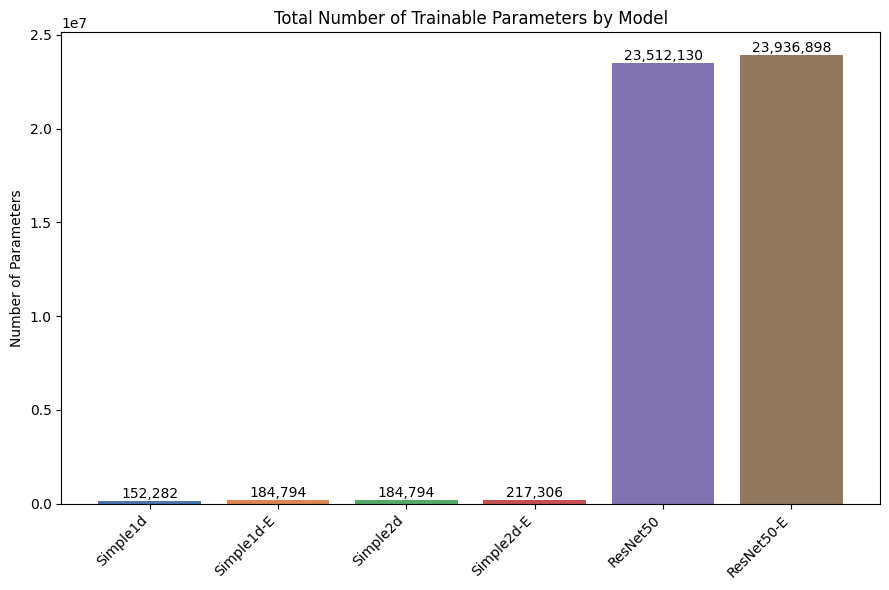

In [24]:
import matplotlib.pyplot as plt
from src.models import Simple1d, Simple1dEmbedding, Simple2d, Simple2dEmbedding
from src.models import ResNet50Embedding
from torchvision.models import resnet50
import seaborn as sns

# Initialize models with the same number of classes for fair comparison
num_classes = 2
models = {
    "Simple1d": Simple1d(num_classes=num_classes),
    "Simple1dEmbedding": Simple1dEmbedding(num_classes=num_classes),
    "Simple2d": Simple2d(num_classes=num_classes),
    "Simple2dEmbedding": Simple2dEmbedding(num_classes=num_classes),
    "ResNet50": resnet50(num_classes=num_classes),
    "ResNet50Embedding": ResNet50Embedding(num_classes=num_classes),
}

# Count parameters for each model
param_counts = {}
for name, model in models.items():
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    name_modified = name.replace("Embedding", "-E")
    param_counts[name_modified] = total_params
    print(f"{name_modified}: {total_params:,} parameters")

palette = sns.color_palette("deep", n_colors=len(models.keys()))

# Create bar chart
plt.figure(figsize=(9, 6))
bars = plt.bar(param_counts.keys(), param_counts.values(), color=palette)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:,}",
        ha="center",
        va="bottom",
    )

plt.title("Total Number of Trainable Parameters by Model")
plt.ylabel("Number of Parameters")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("output/parameter-count.svg")
plt.show()